In [11]:
%pip install -r requirements.txt --upgrade

^C
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd

file_path = "train.csv"

train_data = pd.read_csv(file_path)

print(train_data.head())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

Data set is loaded , Checking for Co-related values...

                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415  

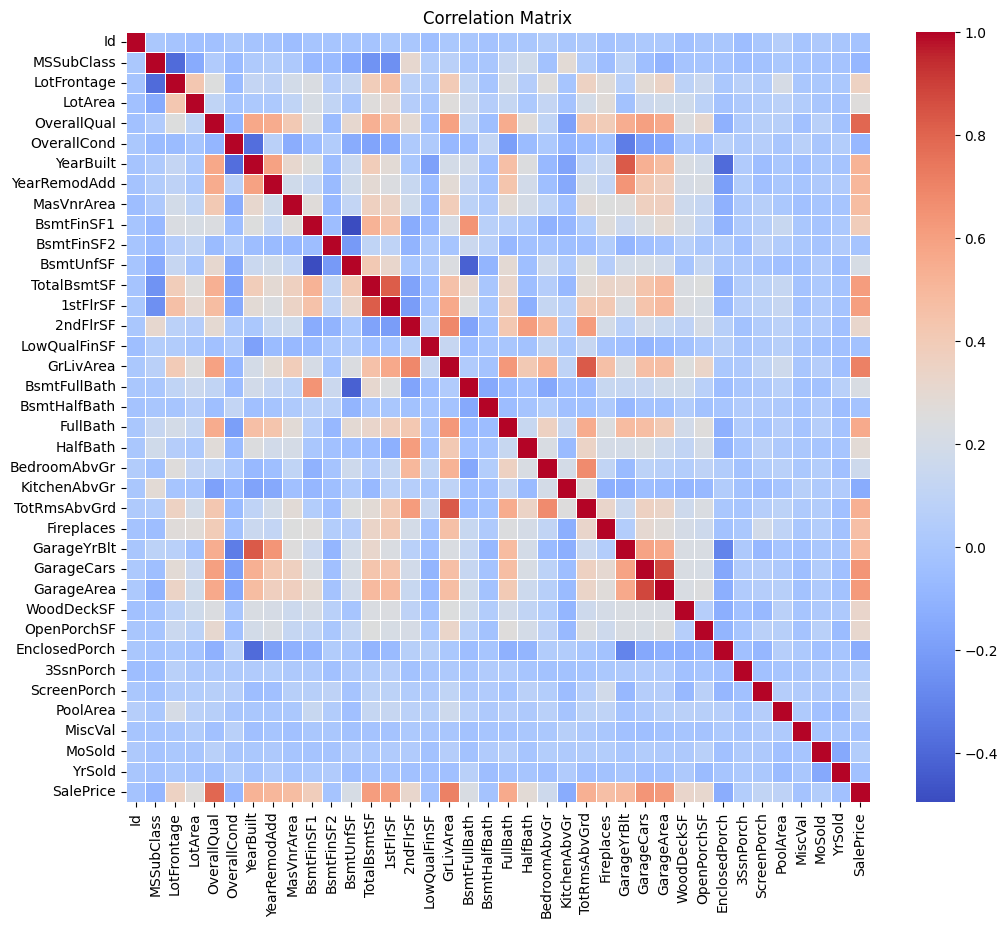

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_data = train_data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print(correlation_matrix)

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()



Co-relation matrix showcases very highly co-related values , other values can be dropped to increase the efficiency of the Linnear regression.

Taking Values with corelation x>0.6

In [27]:
# Set the threshold
threshold = 0.6

# Extract pairs with correlation > +0.6 or < -0.6
correlated_pairs = []

for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[1]):  # Avoid duplicate pairs
        if correlation_matrix.iloc[i, j] > threshold or correlation_matrix.iloc[i, j] < -threshold:
            correlated_pairs.append((
                correlation_matrix.index[i],  # Row name
                correlation_matrix.columns[j],  # Column name
                correlation_matrix.iloc[i, j]  # Correlation value
            ))

# Display the results
for pair in correlated_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]:.2f}")
    
    

OverallQual and GarageCars: 0.60
OverallQual and SalePrice: 0.79
YearBuilt and GarageYrBlt: 0.83
YearRemodAdd and GarageYrBlt: 0.64
BsmtFinSF1 and BsmtFullBath: 0.65
TotalBsmtSF and 1stFlrSF: 0.82
TotalBsmtSF and SalePrice: 0.61
1stFlrSF and SalePrice: 0.61
2ndFlrSF and GrLivArea: 0.69
2ndFlrSF and HalfBath: 0.61
2ndFlrSF and TotRmsAbvGrd: 0.62
GrLivArea and FullBath: 0.63
GrLivArea and TotRmsAbvGrd: 0.83
GrLivArea and SalePrice: 0.71
BedroomAbvGr and TotRmsAbvGrd: 0.68
GarageCars and GarageArea: 0.88
GarageCars and SalePrice: 0.64
GarageArea and SalePrice: 0.62


In [30]:
# Set the threshold
threshold = 0.6

# Extract pairs with correlation > +0.6 or < -0.6
correlated_pairs = []

for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[1]):  # Avoid duplicate pairs
        if correlation_matrix.iloc[i, j] > threshold or correlation_matrix.iloc[i, j] < -threshold:
            correlated_pairs.append((
                correlation_matrix.index[i],  # Row name
                correlation_matrix.columns[j],  # Column name
                correlation_matrix.iloc[i, j]  # Correlation value
            ))

# Display the results
for pair in correlated_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]:.2f}")

BsmtFinSF1 and BsmtUnfSF: -0.50
BsmtUnfSF and BsmtFullBath: -0.42


In [34]:
positive_threshold = 0.6
negative_threshold = -0.4

# Extract pairs with correlation > +0.6 or < -0.4
correlated_pairs = []

for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[1]):  # Avoid duplicate pairs
        correlation_value = correlation_matrix.iloc[i, j]
        if correlation_value > positive_threshold or correlation_value < negative_threshold:
            correlated_pairs.append((
                correlation_matrix.index[i],  # Row name
                correlation_matrix.columns[j],  # Column name
                correlation_value  # Correlation value
            ))

# Sort the pairs by correlation value in ascending order
correlated_pairs_sorted = sorted(correlated_pairs, key=lambda x: x[2])

# Display the sorted results
for pair in correlated_pairs_sorted:
    print(f"{pair[0]} and {pair[1]}: {pair[2]:.2f}")

BsmtFinSF1 and BsmtUnfSF: -0.50
BsmtUnfSF and BsmtFullBath: -0.42
OverallQual and GarageCars: 0.60
1stFlrSF and SalePrice: 0.61
2ndFlrSF and HalfBath: 0.61
TotalBsmtSF and SalePrice: 0.61
2ndFlrSF and TotRmsAbvGrd: 0.62
GarageArea and SalePrice: 0.62
GrLivArea and FullBath: 0.63
GarageCars and SalePrice: 0.64
YearRemodAdd and GarageYrBlt: 0.64
BsmtFinSF1 and BsmtFullBath: 0.65
BedroomAbvGr and TotRmsAbvGrd: 0.68
2ndFlrSF and GrLivArea: 0.69
GrLivArea and SalePrice: 0.71
OverallQual and SalePrice: 0.79
TotalBsmtSF and 1stFlrSF: 0.82
GrLivArea and TotRmsAbvGrd: 0.83
YearBuilt and GarageYrBlt: 0.83
GarageCars and GarageArea: 0.88
